In [1]:
import pandas as pd
import numpy as np

y = pd.read_csv('NSL-KDD/KDDTrain+.txt',header=None)
x = pd.read_csv('NSL-KDD/KDDTrain+.txt',header=None)
x

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [2]:
x = x.iloc[:,4:-1]
x = x.iloc[:,:-1]
x = x.values
x = x.astype(int)
x





array([[ 491,    0,    0, ...,    0,    0,    0],
       [ 146,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    1,    0,    0],
       ...,
       [2231,  384,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    1,    0,    0],
       [ 151,    0,    0, ...,    0,    0,    0]])

In [3]:
y = y.iloc[:,4:-1]
y[41] = np.where(y[41] == "normal", 0, 1)
y = y.iloc[:,-1:]
y = y.values
y = y.astype(int)
y

array([[0],
       [0],
       [1],
       ...,
       [0],
       [1],
       [0]])

## Acuracy of the algorithm Decision Tree Model

- Using 30% of the data to test and 70% to train the model

In [4]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics


x_train, x_test,  y_train, y_test = train_test_split(x, y,train_size=0.3)

clf = tree.DecisionTreeClassifier()
classification = clf.fit(x_train, y_train)
y_pred = classification.predict(x_test)

acuracy = metrics.accuracy_score(y_test,y_pred)
performace = round(acuracy,2)
print(acuracy)


0.9961216574811186


# Confusion matrix

[[46880   173]
 [  169 40960]]


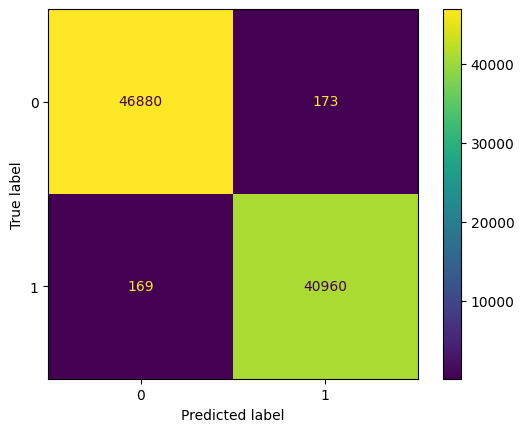

In [5]:

from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


color = 'white'
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=classification.classes_)

print(cm)
disp.plot()
plt.show()

# Recall

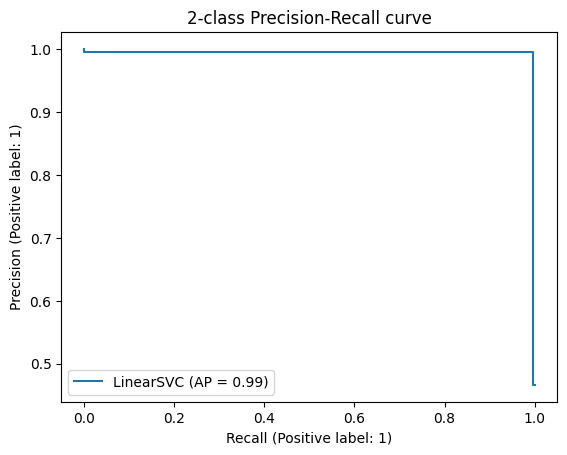

In [6]:

from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import recall_score

recall = (recall_score(y_test, y_pred, average=None))
display = PrecisionRecallDisplay.from_estimator(
    classification, x_test, y_test, name="LinearSVC"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")


In [7]:
from sklearn.metrics import classification_report

target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, target_names=target_names))

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00     47053
     class 1       1.00      1.00      1.00     41129

    accuracy                           1.00     88182
   macro avg       1.00      1.00      1.00     88182
weighted avg       1.00      1.00      1.00     88182

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     47053
           1       1.00      1.00      1.00     41129

    accuracy                           1.00     88182
   macro avg       1.00      1.00      1.00     88182
weighted avg       1.00      1.00      1.00     88182



y_train.shape

for i in range(len(DataBaseTest.index)):
    if DataBaseTest.iloc[i,-2] == 'normal':
        DataBaseTest.iloc[i,-2] = 0
    else:
        DataBaseTest.iloc[i,-2] = 1
DataBaseTest = DataBaseTest.iloc[:,:-1]
DataBaseTest = DataBaseTest.iloc[:,4:].values
DataBaseTest = DataBaseTest.astype(int)
